In [135]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'font.family': 'serif', 'figure.figsize': (12, 6)})
from scipy.optimize import curve_fit

# read in data
header = ["voltage","current"]
raw_data = np.genfromtxt('diode-data.csv', delimiter=',', skip_header=1, names=header)
voltage = raw_data["voltage"]
current = raw_data["current"]

# sort data by voltage 
sort_index = np.argsort(voltage)
voltage = voltage[sort_index]
current = current[sort_index]

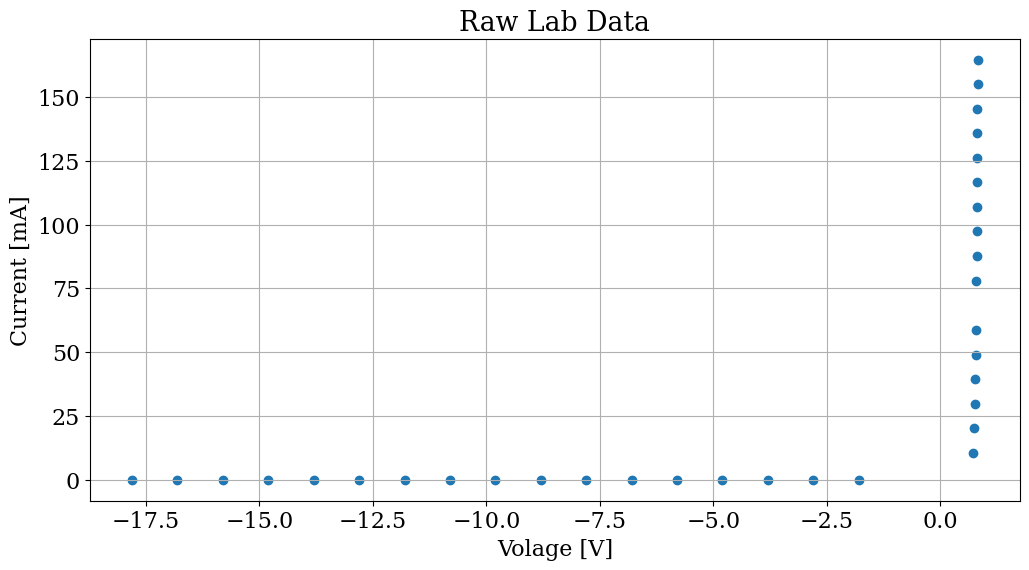

In [136]:
# plot raw data
fig = plt.figure()
plt.title("Raw Lab Data")
plt.scatter(voltage, current, label="Raw Data")
plt.xlabel("Volage [V]")
plt.ylabel("Current [mA]")
plt.grid()
fig.savefig("raw_data.pdf")

I(V) = I_s * (exp(V/V_T) - 1)
I_s = 5.798747142212805e-08 +/- 7.681641826512206e-09 mA
V_T = 0.03780457847645423 +/- 0.00023313562739281008 V


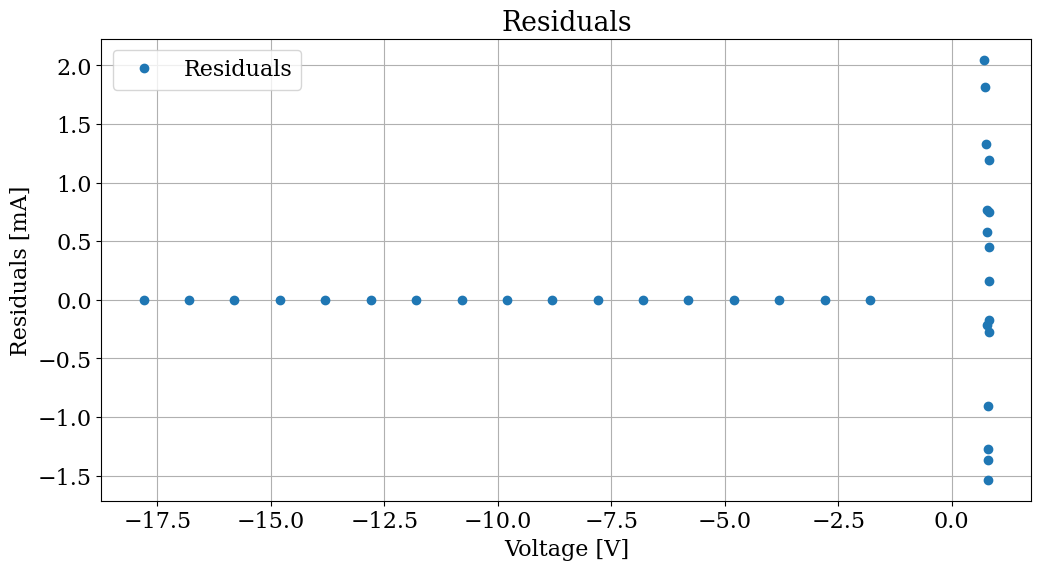

In [137]:
def shockley(V, I_s, V_T):
    return I_s * (np.exp(V / V_T) -1)
popt, pcov = curve_fit(shockley, voltage, current, p0=[6e-08, 0.378])
param_unc = np.sqrt(np.diag(pcov))
residuals = current - shockley(voltage,*popt)

plt.title("Residuals")
plt.errorbar(voltage, residuals, fmt="o", label="Residuals")
plt.xlabel("Voltage [V]")
plt.ylabel("Residuals [mA]")
plt.grid()
plt.legend()
plt.savefig("residuals.pdf")


print("I(V) = I_s * (exp(V/V_T) - 1)")
print(f"I_s = {popt[0]} +/- {param_unc[0]} mA")
print(f"V_T = {popt[1]} +/- {param_unc[1]} V")

Text(0, 0.5, 'Residuals [mA]')

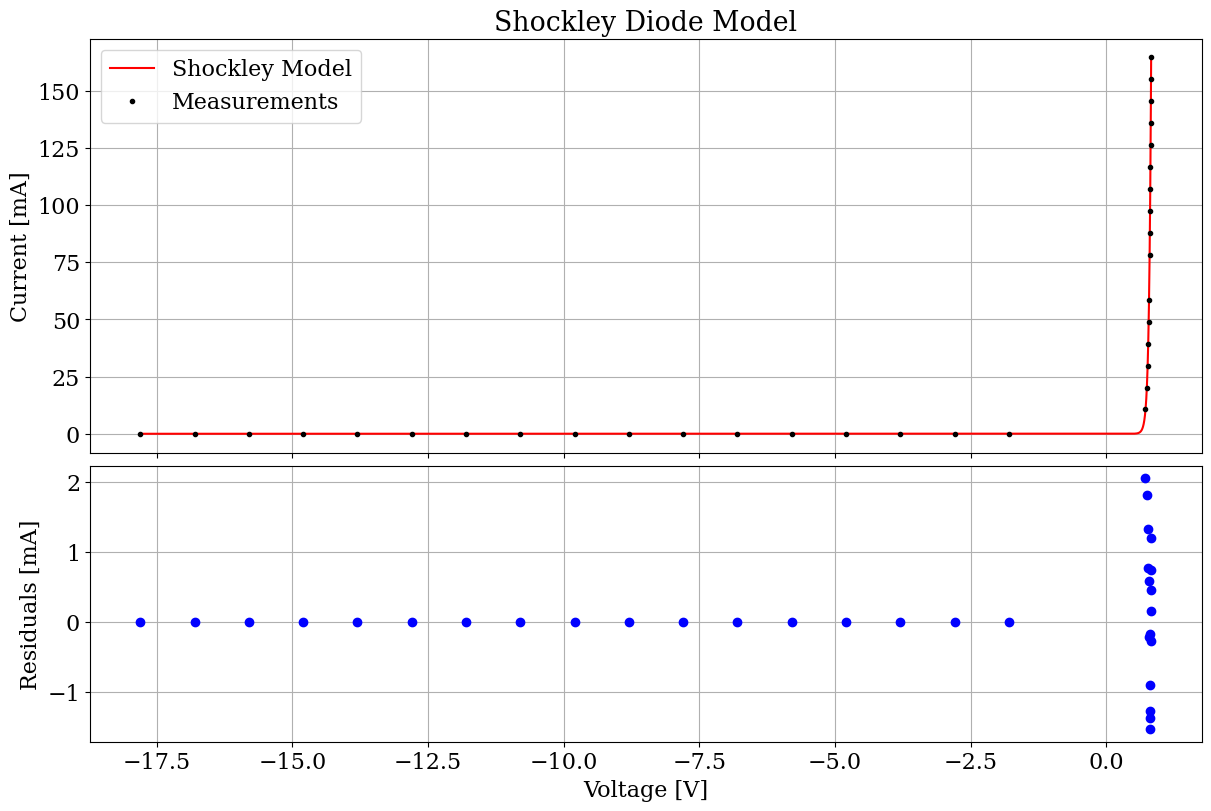

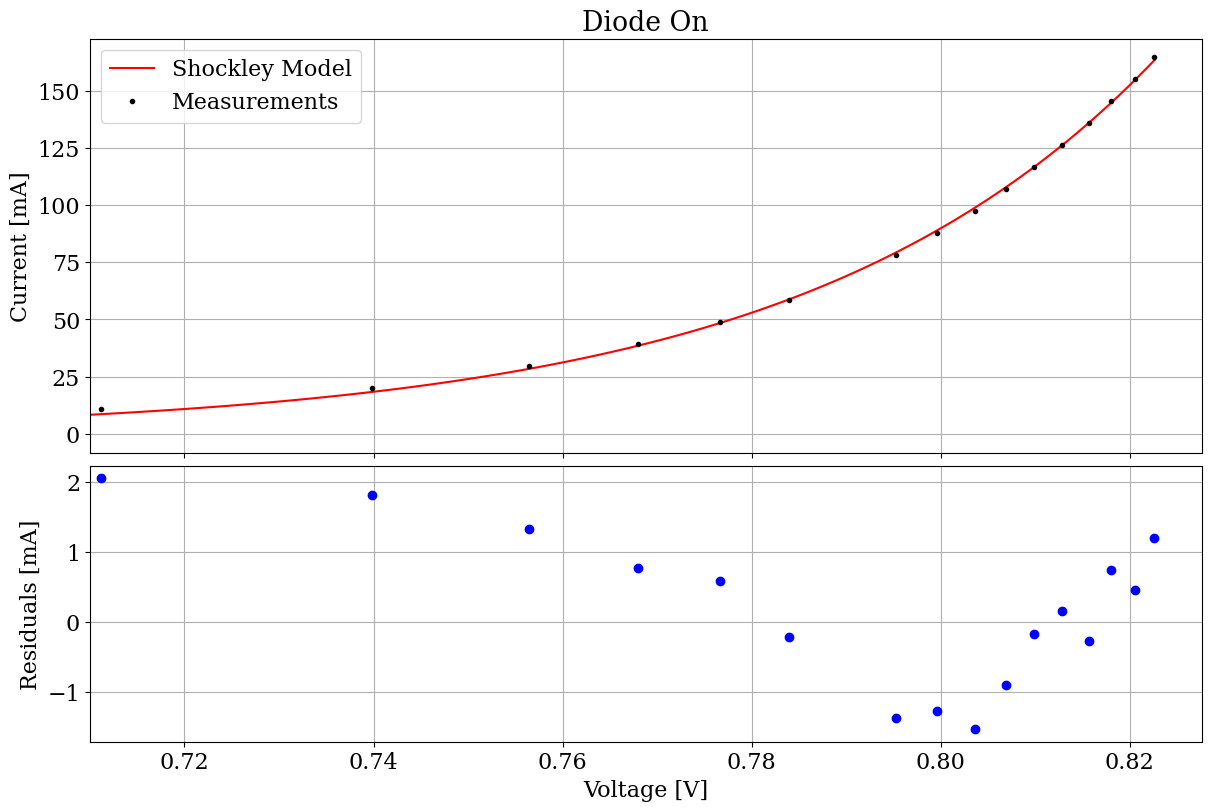

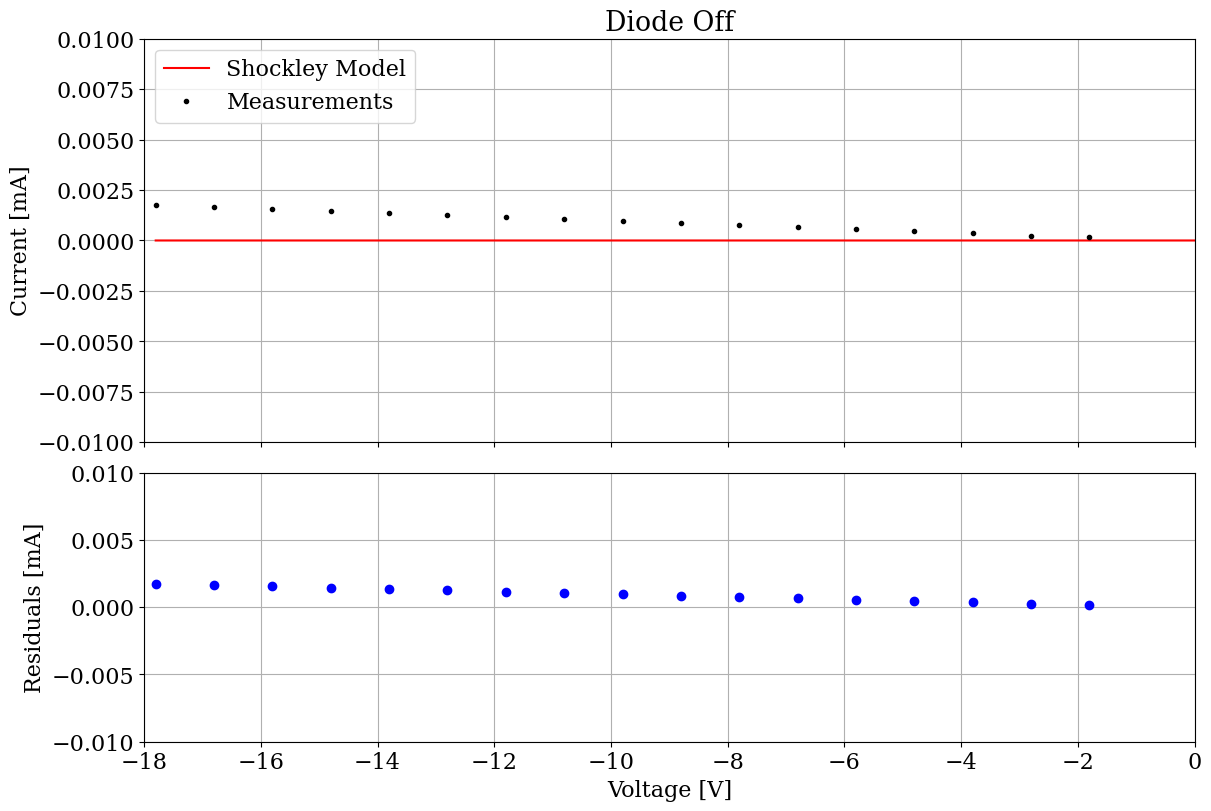

In [142]:
model_voltages = np.linspace(np.min(voltage), np.max(voltage), 20000)

fig, axs = plt.subplots(2,1,layout="constrained",gridspec_kw={'height_ratios': [3, 2]},sharex=True,figsize=(12,8))
# axs[0].set_xlim(0.7, np.max(voltage)+0.050)
# axs[1].set_xlim(0.7, np.max(voltage)+0.050)
axs[0].set_title("Shockley Diode Model")
axs[0].errorbar(voltage, current, label="Measurements",fmt="o",color="black" ,capsize=3,markersize=3)
axs[0].plot(model_voltages, shockley(model_voltages, *popt), label="Shockley Model", color="red")
axs[0].set_ylabel("Current [mA]")
axs[0].grid()
axs[0].legend()
axs[1].errorbar(voltage, residuals, fmt="o", color="blue", capsize=3)
axs[1].grid()
axs[1].set_xlabel("Voltage [V]")
axs[1].set_ylabel("Residuals [mA]")

fig, axs = plt.subplots(2,1,layout="constrained",gridspec_kw={'height_ratios': [3, 2]},sharex=True,figsize=(12,8))
axs[0].set_xlim(0.71, np.max(voltage)+0.005)
axs[1].set_xlim(0.71, np.max(voltage)+0.005)
axs[0].set_title("Diode On")
axs[0].errorbar(voltage, current, label="Measurements",fmt="o",color="black" ,capsize=3,markersize=3)
axs[0].plot(model_voltages, shockley(model_voltages, *popt), label="Shockley Model", color="red")
axs[0].set_ylabel("Current [mA]")
axs[0].grid()
axs[0].legend()
axs[1].errorbar(voltage, residuals, fmt="o", color="blue", capsize=3)
axs[1].grid()
axs[1].set_xlabel("Voltage [V]")
axs[1].set_ylabel("Residuals [mA]")


fig, axs = plt.subplots(2,1,layout="constrained",gridspec_kw={'height_ratios': [3, 2]},sharex=True,figsize=(12,8))
axs[0].set_xlim(-18, 0)
axs[0].set_ylim(-0.01,0.01)
axs[1].set_xlim(-18, -0)
axs[1].set_ylim(-0.01,0.01)
axs[0].set_title("Diode Off")
axs[0].errorbar(voltage, current, label="Measurements",fmt="o",color="black" ,capsize=3,markersize=3)
axs[0].plot(model_voltages, shockley(model_voltages, *popt), label="Shockley Model", color="red")
axs[0].set_ylabel("Current [mA]")
axs[0].grid()
axs[0].legend()
axs[1].errorbar(voltage, residuals, fmt="o", color="blue", capsize=3)
axs[1].grid()
axs[1].set_xlabel("Voltage [V]")
axs[1].set_ylabel("Residuals [mA]")